In [4]:
# importing the required library
import pandas as pd
from matplotlib import pyplot as plt


In [31]:
# Reading in the file, make sure file is in same directory as this python notebook
df = pd.read_csv("onlineretail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


In [32]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [33]:
df.index = df["InvoiceNo"]

In [34]:
df = df[['StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',  'Country']]
df

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
InvoiceNo,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,United Kingdom
536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,United Kingdom
...,...,...,...,...,...,...
536592,84663A,GRASS HOPPER WOODEN WALL CLOCK,1,01/12/2010 17:06,5.91,United Kingdom
536592,84692,BOX OF 24 COCKTAIL PARASOLS,3,01/12/2010 17:06,0.85,United Kingdom
536592,84754,S/15 SILVER GLASS BAUBLES IN BAG,1,01/12/2010 17:06,2.51,United Kingdom


In [35]:
df.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
InvoiceNo,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,United Kingdom
536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,United Kingdom


In [36]:
df["StockCode"].unique()

array(['85123A', '71053', '84406B', ..., '84659A', '84663A', '84828'],
      dtype=object)

In [37]:
df[["StockCode","Quantity"]].value_counts()

StockCode  Quantity
22752      2           8
22900      1           7
22969      12          7
22632      12          6
22866      1           6
                      ..
22142      2           1
           1           1
22139      56          1
           23          1
POST       3           1
Length: 2439, dtype: int64

In [38]:
df["StockCode"].unique()

array(['85123A', '71053', '84406B', ..., '84659A', '84663A', '84828'],
      dtype=object)

In [39]:
df[["StockCode","UnitPrice"]].describe()

,UnitPrice
count,3069.000000
mean,4.021574
std,12.068726
min,0.000000
25%,1.450000
50%,2.510000
75%,4.250000
max,569.770000


In [40]:
df.groupby("UnitPrice")[
       "UnitPrice"].count()

UnitPrice
0.00      10
0.10       1
0.12       2
0.21       4
0.24       1
          ..
50.00      1
51.02      1
59.53      1
165.00     3
569.77     1
Name: UnitPrice, Length: 110, dtype: int64

In [41]:
df.groupby("StockCode")[["Quantity",
                       "InvoiceDate"]].mean()

,Quantity
StockCode,
10002,30.000000
10125,2.000000
10133,5.000000
10135,1.000000
11001,3.000000
...,...
C2,1.000000
D,-1.000000
DOT,1.000000


<AxesSubplot:title={'center':'MOME Applications by Desc'}, ylabel='UnitPrice'>

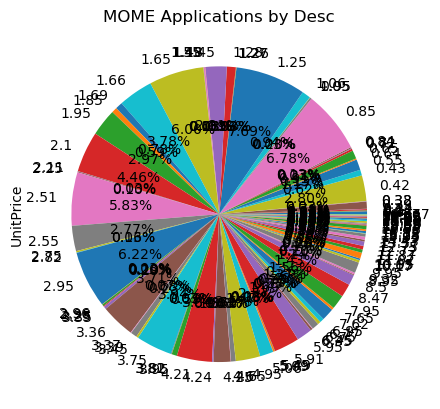

In [43]:
brough_count = df.groupby("UnitPrice")["UnitPrice"].count()
brough_count.plot.pie(autopct='%.2f%%', title="MOME Applications by UnitPrice) 


In [44]:
borough_eventype_grp = df.groupby(["Quantity"])["UnitPrice"].count().reset_index()
borough_eventype_grp 

,Quantity,UnitPrice
0,-24,4
1,-12,3
2,-10,2
3,-7,1
4,-6,2
...,...,...
80,288,1
81,384,1
82,432,2
83,480,1


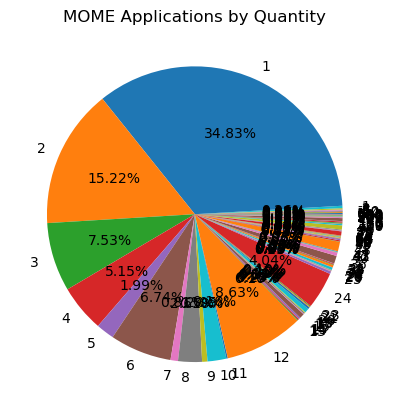

In [47]:
cnt_category = df.groupby(["Quantity"]).size()
plt.pie(cnt_category, labels=cnt_category.index,autopct='%.2f%%',)
plt.title("MOME Applications by Quantity")
plt.show()

In [48]:
# I am going to filter data here as Some Event Duration might be problematic
df["InvoiceDate"].describe()

count                 3069
unique                 117
top       01/12/2010 14:32
freq                   528
Name: InvoiceDate, dtype: object

In [50]:
# So I will filter my data here by Upper limt of 95% Confidence Interval,
# You can also filter by mean+- 3 std_dv, which covers 97% of confidence interval, 
# I am doing 95% confidence interval which is +-2 std_dv
# We know boolean Indexing works in pandas so just using to access original dataframe
upper_interval = df["Quantity"].mean() + df["Quantity"].std()*2
filter_df = df[df["Quantity"]<upper_interval].copy()
filter_df.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
InvoiceNo,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,United Kingdom
536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,United Kingdom


<AxesSubplot:title={'center':'Quantity Histogram(MicroSeconds)'}, ylabel='Frequency'>

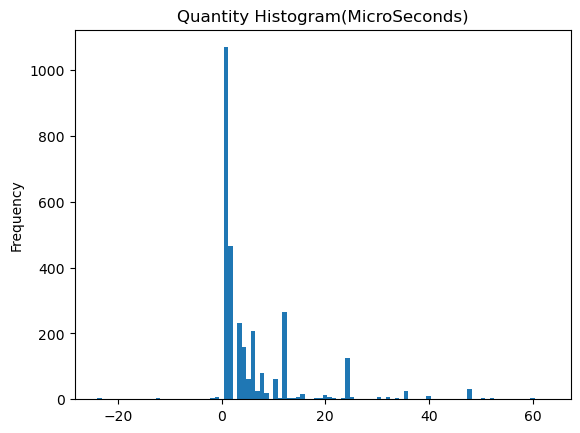

In [51]:
# To chaeck normality of data, I will creat a histogram chart here
filter_df["Quantity"].astype(int).plot.hist(bins=100,
                                            title="Quantity Histogram(MicroSeconds)")